# Homework 3
### Tristan Larkin
### Collaborators: Erin, Althea, Andrew, ChatGPT
### Due: End of Day Sunday April 9th, 2023

## Problem 1
In the lectures, we discussed three shortest path algorithms (i.e, Bellman-Ford, Floyd-Warshall,
and Dijkstra’s) based on structural inductions. Answer the following questions regarding these
three shortest paths algorithms.
- Describe the main induction hypothesis for these three shortest path algorithms.
- Consider the graph as shown below, where all the edges have positive edge weights. What
are the shortest paths from vertex 0 to vertex 7 found by these three algorithms?
- Suppose that the graph as depicted is a toll road network where the edge weights are fees.
With inflation everywhere, the government is considering uniformly increasing these fees.
Under this proposal, each edge weight will be increased uniformly by adding a fee $\epsilon$ $(\epsilon > 0)$. Will any of these three shortest path algorithms be robust under this uniform fee increase
proposal? In other words, the shortest path found remains valid before and after the fee
increase. Explain why?


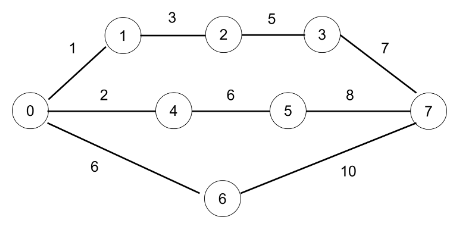

#### Bellman-Ford
We know all the shortest paths from $V_0$ to any vertex in the graph using $\le k - 1$ edges. If so, then we can get to the shortest path using $\le k$ edges because we either know that the path has $\le k - 1$ edges (which we already know by induction hypothesis) or it uses every available edge, and since a shorest path is two smaller shortest paths combined, we know that the path will be given by some path with $\le k - 1$ edges (which again we know) plus the $k^{\text{th}}$ edge. 

It will take the bottom path because the bellman-ford algortihm will always take the shortest path to the solution as it works its way out from the origin node. In this case that path is $ 0 \rightarrow 6 \rightarrow 7 $

Since it does take the least edges path always it will be the shortest path in the new case where we add a cosntant value to each edge. 

#### Floyd-Warshall
We take it that we know all the paths between every pair of verticies $k-1$ stored in a matrix. If we add one more vertex then the shortest path path to the new vertex to each other will be either the direct path created or a path connnected to another shortest path. \
Path: $ 0 \rightarrow 1 \rightarrow 2 \rightarrow 3 \rightarrow 7 $

This will result in the top path because the algorithm adds the verticies in order of index, and the top has the lowest indicies.

Since the path is chosen based in the index order it will not be robust to the change presented, and that is seen as an example in this graph.

#### Dijkstras
Assuming we know the $k$ closest verticies to source $s$ we can find the $k+1$ closest vertex since it will be either a direct path or through a previously found shortest path. Path: $ 0 \rightarrow 6 \rightarrow 7 $

In this case it will be the bottom path because it will get to all three of the final path edges where top is 9, middle is 8, and bottom is 6, so it will choose to take the bottom path.

Even though it is the same path in the case given, it will not always be the correct path in this situation. For example if we started at 7 and went to 0 it would take the top path.

## Problem 2
In class we discussed the union-find data structure for implementing make-set, find, and union
operations for n given elements using a tree. It was mentioned that we can guarantee $O (\log n)$
time performance for all three operations using union-by-rank. Prove that this claim is true.


What we need for $O(\log n)$ performance on these operations is for **find()** to be $O(\log n)$ since it is used to get the top level element. This means **make-set()** needs to build the disjoint sets in a way that never makes a tree with a height more than $\log n$. 

Our base case we need to think about is how many of the trees can reach rank (height) 0. That would be 
$$ V_0 \le n = \frac{n}{2^0} $$
For now lets assume that the number of nodes that reach rank $k$ is given by 
$$ V_k \le \frac{n}{2^k} $$
Now we need to show that $ V_{k+1} \le \dfrac{n}{2^{k+1}} $. For a node to reach rank $k+1$ it would have to reach it by combining two trees of rank $k$. Any less then the new rank would just be the larger of the two sets being joined together. 
$$ V_{k} \le \dfrac{n}{2^{k}} $$
$$ V_{k+1} \le \dfrac{n}{2^{k+1}} = \frac{1}{2} \dfrac{n}{2^{k}} $$
$$ \Rightarrow V_{k+1} \le \dfrac{V_{k}}{2} $$



This shows that the number of nodes that can reach rank $k+1$ is at most half the number of nodes that can reach rank $k$. This is also supported by the fact that we are using $2V_k$ nodes to make a single $V_{k+1}.

Single any tree will have at most the highest ranks height, then we can look at how tall our trees will be. Assuming maximum height given $n$ nodes we know that the tallest tree will be 
$$ 1=\frac{n}{2^k} $$
$$ 2^k = n $$
$$ k = \log_2{n}$$
Which is what we need it to be, so all our functions will work in $O(\log n)$ time.

## Problem 3
Suppose you are given an undirected simple graph $G(V, E)$. Design an efficient algorithm to
determine if the given graph is a tree or not. Note that you should also discuss how you want
the input graph to be represented, e.g., an adjacency list or an adjacency matrix.


Firstly we know that a tree is just an undirected simple graph that is acyclic / minimally connected. (i.e. $E = V - 1$). Therfore we can first check if the number of edges is greater than $V-1$ and if it is we can immediately return False.

The only other condition we need to satisfy is that the graph is connected. We can do that just by running BFS at any node. If that BFS does not find every other node in the graph then it is not a tree.

```js
function is_tree(G: graph in adjacency list format){
    if G.E = G.V - 1 is not true then return false

    Run BFS on an element in G
    if BFS does not find all verticies return false

    otherwise return true
}
```

Assuming the most basic input, we need to spend $O(V)$ time making sure $E$ is less than $V-1$. Then BFS takes $O(E + V)$ time, but we already ensured that $ E = V - 1 $ that makes this $O(2V) = O(V)$. The entire algorithm is linear with respect to the number of verticies.

## Problem 4
A Hamiltonian path is a simple path that includes all the vertices of the graph. Design an
efficient algorithm to determine if a given DAG exhibits a Hamiltonian path.


The naive approach is to just start at a node and look to see if you can move to the child node marking what you have seen. Since there are noo cycles in a DAG we know that you can just look at the next, and as soon as you hit a node with two options it fails, since you will never be able to come back. Then repeat for each node.

Since we are working with a DAG we can topilogically sort the graph in linear time. After we do that we can easily check if the original graph exibits a Hamiltonian path by checking if any items in the topological sort are on the same level. Any items on the same level of a topilogically sorted graph cannot all be in the same simple path, since you can only move down, not to the side. Since we technically just care about the levels of the topological sort and not the actual order, I will just use the DFS part of topological sort.

```js
function has_Hamiltonian(G: DAG){
    call DFS(G) to compute the finishing times v.finish for each vertex // O(V + E)
    if any two values of v.finish are the same return false // O(V)
    else return true
}
```

The DFS takes $O(V+E)$ and so the algortihm runs in that time.

## Problem 5
Let $G(V, E)$ be an undirected weighted graph, and let $T$ be the MST of $G$. Suppose that we
increase the weights of all the edges in $G$ by a constant $c$. Is $T$ still the MST of $G$? Explain
why?


If we have a set of sorted numbers $ L = \{n_1, n_2, n_3, ..., n_N\} $ we can add a constant $c$ to each value and the order will not change. This means the same is true for the list of edge weights. Since $a < b \Rightarrow (a + c) < (b + c)$ we know that the $V-1$ shortest edges will still be the shortest edges. The MST will be the same edges but depending on the implementation, the edges in the MSP might not be updated to have each edge with $+c$ weights.

## Problem 6
Let $G(V, E)$ be an undirected weighted graph, and let $T$ be an MST of $G$. Suppose that we add
a new vertex $v$ to $G$, together with some weighted edges from $v$ to some vertices of $G$. Design a
linear-time algorithm to find the new MST of $G$ after adding $v$.


The naive algortimth is to just recompute the MST from scratch and that would take $O(E \log V)$ time. We can try to take advantage of our already built $T$ to make $T'$.

The next step is to acknowledge that we will never have to use the originally ignored edges. So we can just use $T$ with the new vertex and edges as out new $G$ and then we can build a MSP in $O(V \log V)$ (where V is the toal edges) since we can ignore the originally unused edges in $G$. 

Another option is to add the new edges one at a time, from smallest to largest. After the second edge added we know there will be a cycle, and we run DFS to find the cycle and remove the heaviest edge. We can repeat this for every edge added. This would be $O(Vk)$ where $k$ is the number of new edges.

None of these are linear time always but the $O(V \log v)$ one is linear with respect to $E$ if $E$ is large (on the scale of $V^2$) and the $O(Vk)$ algorithm is close to linear if we take $k$ to be very small.

## Problem 7
Design an algorithm for updating an MST after deleting a node or an edge.


If we delete a node in an MST then we know that the MST will now we disconnected and will need to use at least one edge from the graph it came from to replace it. To find the disconected graphs we can run BFS on the tree and repeat until we find all the nodes in the two separate trees. The edges that were seen are then going to be marked as used. For clarification this is run on the two sections of the MST, not the whole graph. Then we can find all the edges that connect the two disconnected trees together and take the smallest one. The DFS calls takes $O(V + E)$ in the worst case. Then we need to look at the remaining edges (i.e. the ones that are not in the MST). This could be acomplished by putting each of the elements of each tree into a disjoint set in a *union-find* data structure, which itself can be done in linear time, $O(V)$, if we specifically add averything in one tree to the same node and avoid and long trees inside the union-find. Then we just need to look at the remaining edges in the graph and use the **find()** function which is $O(\log n)$ once for each edge. The smallest edge in that list is kept. That is $O(N \log n)$. With total time $O(E + V \log V)$.

## Problem 8
Suppose you are working for CISCO to design network routing protocols. Suppose you are given
a graph where the edges represent connections between routers in the Internet, where the weight
of an edge represents the bandwidth of a connection between two routers. The goal here is to
find a path between two Internet nodes that has the maximum possible bandwidth. Discuss how
you would go about solving the problem.

What we want is the Maximum Spanning Tree. This would get rid of all the bottlenecks that are going to decrease the overall bandwidth. The easiest way to do this is a slight modification to Krushall's algorithm. Instead of using a min heap to keep track of the values we want to use a max heap, and add the largest weight to the union-find. That will leave behind all the uneccisary edges of smallest value, hence get rid of all the edges that would decread the bandwidth of any path. This is the same running time as Kruskall's, $O((V+E) \log V)$.